In [184]:
import matplotlib.pyplot as plt
import pandas as pd
from process_survey_data import (
    mapping,
    create_visit_reason_columns, 
    # create_mkting_content_seen_columns,
    create_mkting_content_pref_columns
)
import seaborn as sns


In [185]:
survey_data = pd.read_csv("../data/survey_responses/cleaned_survey_responses.csv")
social_media_data = pd.read_csv("../data/Instagram/Data/uss_ig_classified_sentiment.csv")

In [186]:
# process survey data and create more dataframes from it
survey_data = mapping(survey_data.loc[:, ['visit_freq', 'top_expense', 'visit_reason', 'mkting_content_pref']])
survey_visit_reasons = create_visit_reason_columns(survey_data.copy())
survey_mkting_pref = create_mkting_content_pref_columns(survey_data.copy())

In [187]:
survey_visit_reasons.columns[6]

'attraction'

In [188]:
def top_visit_reasons(data):
    d = {}
    for i in range(6, 14):
        d[survey_visit_reasons.columns[i]] = survey_visit_reasons.iloc[:, i].sum()
    df = pd.DataFrame(list(sorted(d.items(), key = lambda reason: reason[1])), columns=['Visit Reason', 'Count'])
    return df

In [189]:
top_visit_reasons(survey_visit_reasons)

,Visit Reason,Count
0,social_media,11
1,new_attraction,33
2,tourism,46
3,attraction,50
4,leisure,51
5,promotion,61
6,event,76
7,social,132


In [190]:
def top_mkting_pref(data):
    d = {}
    for i in range(6, 11):
        d[survey_mkting_pref.columns[i]] = survey_mkting_pref.iloc[:, i].sum()
    df = pd.DataFrame(list(sorted(d.items(), key = lambda content: -content[1])), columns=['Visit Reason', 'Count'])
    return df

In [191]:
top_mkting_pref(survey_mkting_pref)

,Visit Reason,Count
0,deals_promotions,146
1,attraction_events,90
2,engagement_based,23
3,insider_access,22
4,social_media,22


Most visitors to theme parks are motivated by social reasons, primarily to spend time with family and friends. Additionally, many attend events such as seasonal celebrations and special exhibitions. The preferred marketing content includes deals and promotions (e.g., discounts and bundles) and attraction events (e.g., announcements of new attractions or events).

In [192]:
survey_data["frequency"].value_counts()
# survey_data["spender_type"].value_counts()

frequency
rare         103
moderate      31
traveller     27
frequent      10
Name: count, dtype: int64

Most people rarely visit the theme park, and based on guest_segmentation.ipnyb, frequency has the highest Gini importance when it comes to determining how much a person spends each time at the par. Hence, in the next section we will analyse visit_reasons and mkting_content_pref based on how frequently they visit

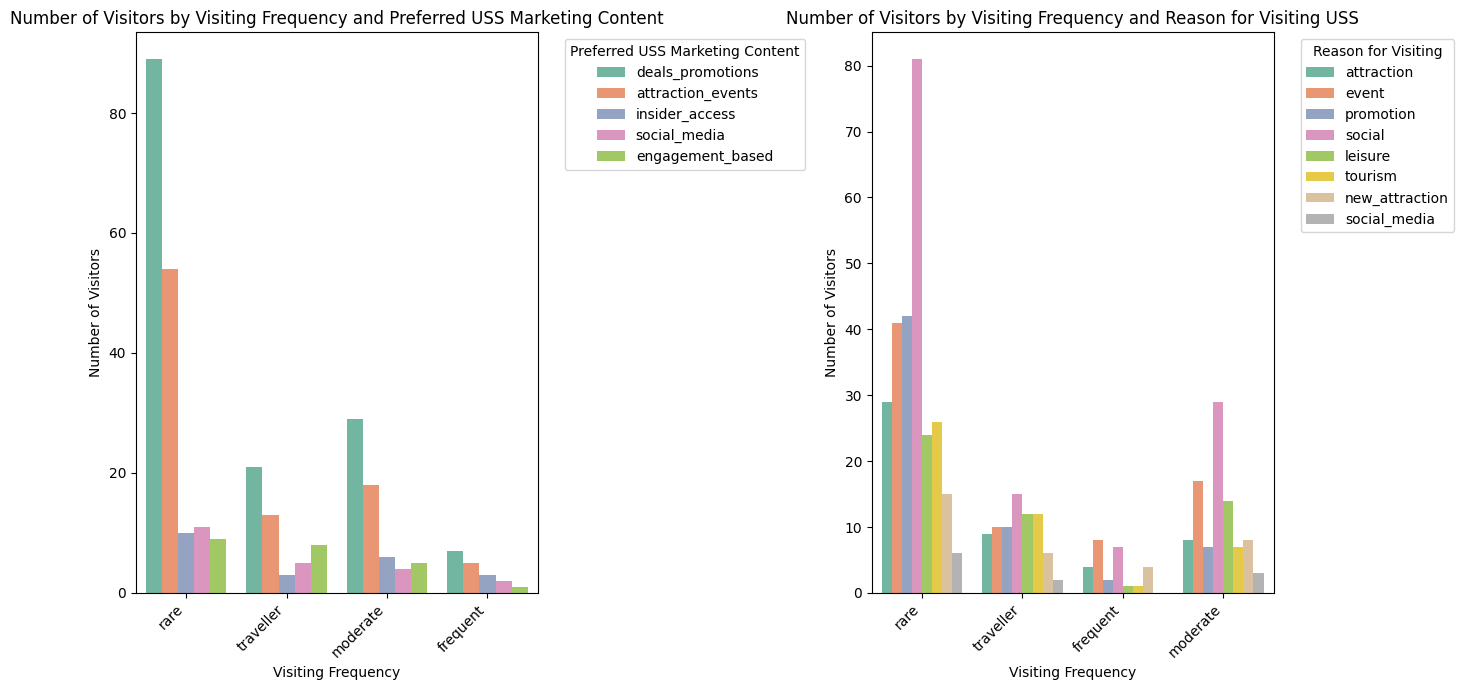

In [193]:
# Marketing Content Plotting
marketing_content = {
    "deals_promotions": "Discounts, special offers, or bundles",
    "attraction_events": "New attractions or event announcements",
    "insider_access": "Behind-the-scenes content or exclusive previews",
    "social_media": "User-generated content (e.g., visitor testimonials, influencer partnerships)",
    "engagement_based": "Interactive experiences (e.g., virtual tours, social media contests)"
}

# Convert data to long format for easy plotting
df_mkting_long = survey_mkting_pref.melt(id_vars=['frequency'], 
                     value_vars=marketing_content.keys(), 
                     var_name="content", 
                     value_name="selected")

# Filter only rows where the reason was selected (assuming 1 means selected)
df_mkting_long = df_mkting_long[df_mkting_long['selected'] == 1]

# Visit Reasons Plotting
reasons = {
    "attraction": "To experience a specific attraction or ride",
    "event": "To attend a special event or seasonal celebration (e.g., Halloween, Christmas, Exhibitions in collaboration with other franchises)",
    "promotion": "Because of a special promotion or discount",
    "social": "To spend time with family/friends",
    "leisure": "For a relaxing getaway or vacation",
    "tourism": "As part of a larger travel plan (e.g., trip to the area)",
    "new_attraction": "To visit a newly opened or recently renovated park/area",
    "social_media": "Because of a social media post or influencer recommendation"
}

# Convert data to long format for easy plotting
df_reasons_long = survey_visit_reasons.melt(id_vars=['frequency'], 
                     value_vars=reasons.keys(), 
                     var_name="reason", 
                     value_name="selected")

# Filter only rows where the reason was selected (assuming 1 means selected)
df_reasons_long = df_reasons_long[df_reasons_long['selected'] == 1]

# Combined Plot
plt.figure(figsize=(14, 7))

# Marketing Content Count Plot
plt.subplot(1, 2, 1)
sns.countplot(data=df_mkting_long, x="frequency", hue="content", palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Visiting Frequency")
plt.ylabel("Number of Visitors")
plt.title("Number of Visitors by Visiting Frequency and Preferred USS Marketing Content")
plt.legend(title="Preferred USS Marketing Content", bbox_to_anchor=(1.05, 1), loc="upper left")

# Visit Reasons Count Plot
plt.subplot(1, 2, 2)
sns.countplot(data=df_reasons_long, x="frequency", hue="reason", palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Visiting Frequency")
plt.ylabel("Number of Visitors")
plt.title("Number of Visitors by Visiting Frequency and Reason for Visiting USS")
plt.legend(title="Reason for Visiting", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

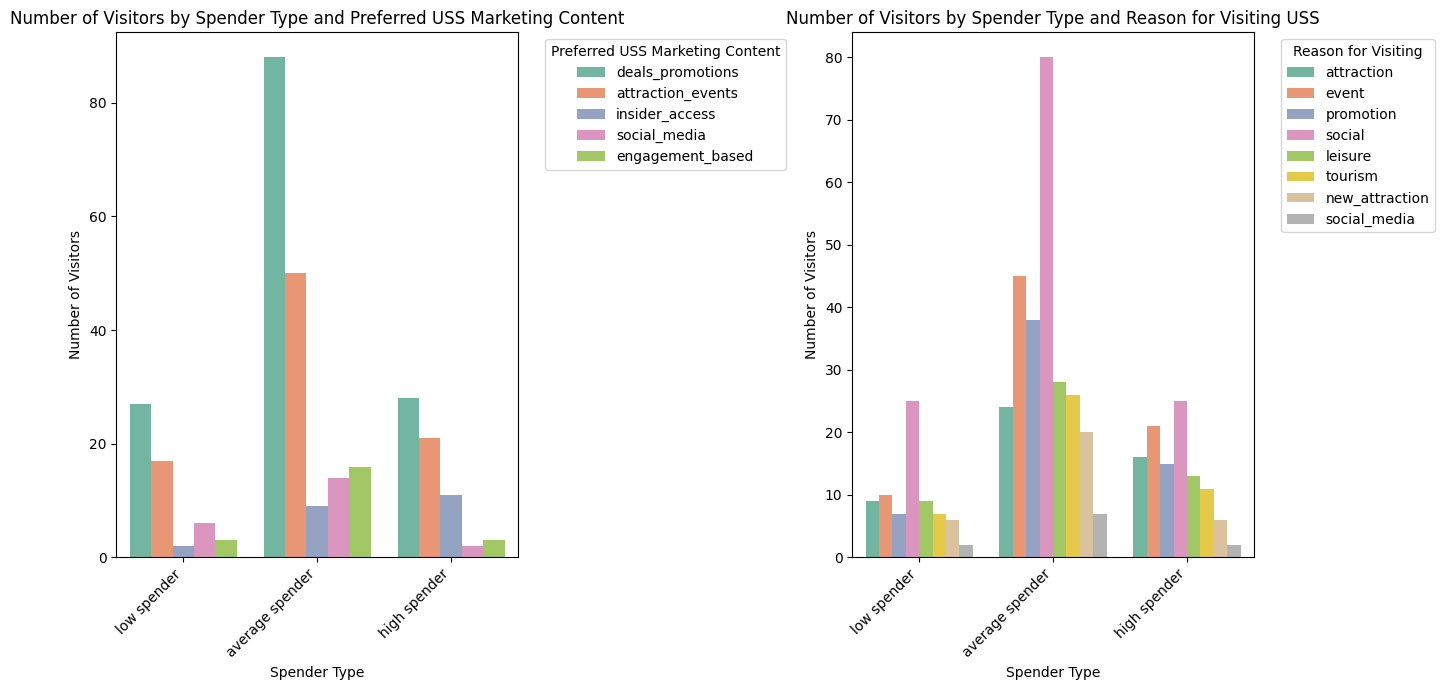

In [194]:
# Convert data to long format for easy plotting
df_mkting_long = survey_mkting_pref.melt(id_vars=['spender_type'], 
                     value_vars=marketing_content.keys(), 
                     var_name="content", 
                     value_name="selected")

# Filter only rows where the reason was selected (assuming 1 means selected)
df_mkting_long = df_mkting_long[df_mkting_long['selected'] == 1]

# Convert data to long format for easy plotting
df_reasons_long = survey_visit_reasons.melt(id_vars=['spender_type'], 
                     value_vars=reasons.keys(), 
                     var_name="reason", 
                     value_name="selected")

# Filter only rows where the reason was selected (assuming 1 means selected)
df_reasons_long = df_reasons_long[df_reasons_long['selected'] == 1]

# Combined Plot
plt.figure(figsize=(14, 7))

# Marketing Content Count Plot
plt.subplot(1, 2, 1)
sns.countplot(data=df_mkting_long, x="spender_type", hue="content", palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Spender Type")
plt.ylabel("Number of Visitors")
plt.title("Number of Visitors by Spender Type and Preferred USS Marketing Content")
plt.legend(title="Preferred USS Marketing Content", bbox_to_anchor=(1.05, 1), loc="upper left")

# Visit Reasons Count Plot
plt.subplot(1, 2, 2)
sns.countplot(data=df_reasons_long, x="spender_type", hue="reason", palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Spender Type")
plt.ylabel("Number of Visitors")
plt.title("Number of Visitors by Spender Type and Reason for Visiting USS")
plt.legend(title="Reason for Visiting", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

USS' Instagram Engagement Analysis

In [203]:
social_media_data.describe()

,num_likes,family_friendly,high_value,influencer,halloween,festive,is_minion,deals_promotions,attraction_event,num_comments,sentiment,engagement_score
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,814.164179,0.095949,0.051173,0.085288,0.206823,0.110874,0.132196,0.255864,0.055437,6.042644,0.044417,828.470326
std,1856.520022,0.294836,0.220585,0.279608,0.405460,0.314312,0.339066,0.436811,0.229076,44.896775,0.118570,1910.629578
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.299700,21.000000
25%,166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.000000
50%,280.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.000000
75%,588.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,593.000000
max,19522.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,938.000000,0.843900,21405.934366


<Axes: xlabel='engagement_score', ylabel='Density'>

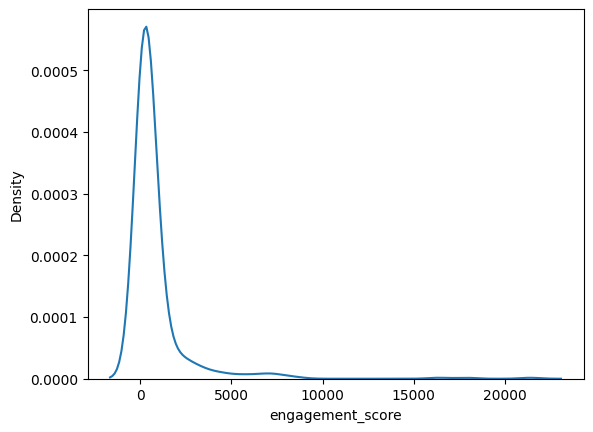

In [195]:
sns.kdeplot(data=social_media_data["engagement_score"])

In [196]:
sorted_social_media_data = social_media_data.sort_values(by="engagement_score", ascending=False)

In [199]:
sorted_social_media_data.head(10)

,shortcode,caption,num_likes,comments,post_date,post_type,family_friendly,high_value,influencer,halloween,festive,is_minion,deals_promotions,attraction_event,num_comments,sentiment,engagement_score
156,C_KFV9zSZ99,there’s turning back you’ve pulled ‘under cast...,19522,"{'universalstudiossingapore': ['🔥🔥🔥'], 'jackso...",2024-08-27,Video Post,0,1,1,1,0,0,1,0,938,0.158687,21405.934366
84,DCGvAbzS8dd,mischief making! here’s exclusive sneak peek p...,17648,{'reuel._.revaa': ['super excited go singapore...,2024-11-08,Video Post,0,1,0,0,0,1,0,0,92,0.112037,17837.601848
164,C-mFbDzS6MS,dare step realm darkest dream become reality? ...,16285,"{'universalstudiossingapore': ['excited 🔥🙌'], ...",2024-08-13,Video Post,0,0,0,1,0,0,0,0,22,-0.028355,16327.582273
193,C9PSB9LSc8Z,it’s mega despicable summer @universalstudioss...,8585,{'ristha_an1993': ['pengen ke singapura 😢😢😢❤️❤...,2024-07-10,Video Post,1,0,0,0,0,1,0,0,13,0.133015,8617.650769
406,Ct3DlxLMX0e,it’s world thrill universal studio singapore. ...,7995,{'piterpanjaitan': ['high-season holiday seaso...,2023-06-24,Video Post,0,0,0,0,0,0,0,0,6,0.124700,8013.235000
408,CtvJ0RHvGGU,survive horde zombie turned one undead? heard ...,7633,"{'__jinni0': ['엄마?????? @gyetang2'], 'juisybij...",2023-06-21,Image Post,0,0,0,1,0,0,1,0,57,0.036225,7748.811228
111,DA-tG62tT3M,"every year, attended halloween horror nights, ...",7220,"{'douglastan_cys': ['good luck me? 👀😆'], 'step...",2024-10-11,Video Post,0,0,0,1,0,0,0,0,15,0.308093,7265.404667
39,DE1rOArSAED,look who’s hanging outside universal studio si...,7158,"{'ukeyjoe': ['guy bringing back annual pas'], ...",2025-01-15,Image Post,1,0,0,0,0,1,0,0,28,0.118407,7219.920357
416,Csu_arfpPSn,uncle megatron’s got nothing kids. come univer...,6993,"{'_donjuandemarco1': ['aphine'], 'riariyols': ...",2023-05-27,Video Post,0,0,0,0,0,0,0,0,41,0.113332,7080.666585
117,DA3CD_SS-US,"truly set r.i.p. tour apart dedicated guide, w...",6780,"{'mattsewardart': ['🔥🔥🔥❤️'], 'baymont_xia': ['...",2024-10-08,Video Post,0,1,0,1,0,0,1,1,4,0.000000,6788.000000
